Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/20240620_132914_Run1_VIGO17_NS089008_QPD_0750_20_AS_011_CC_AmplitudeUniformity.png


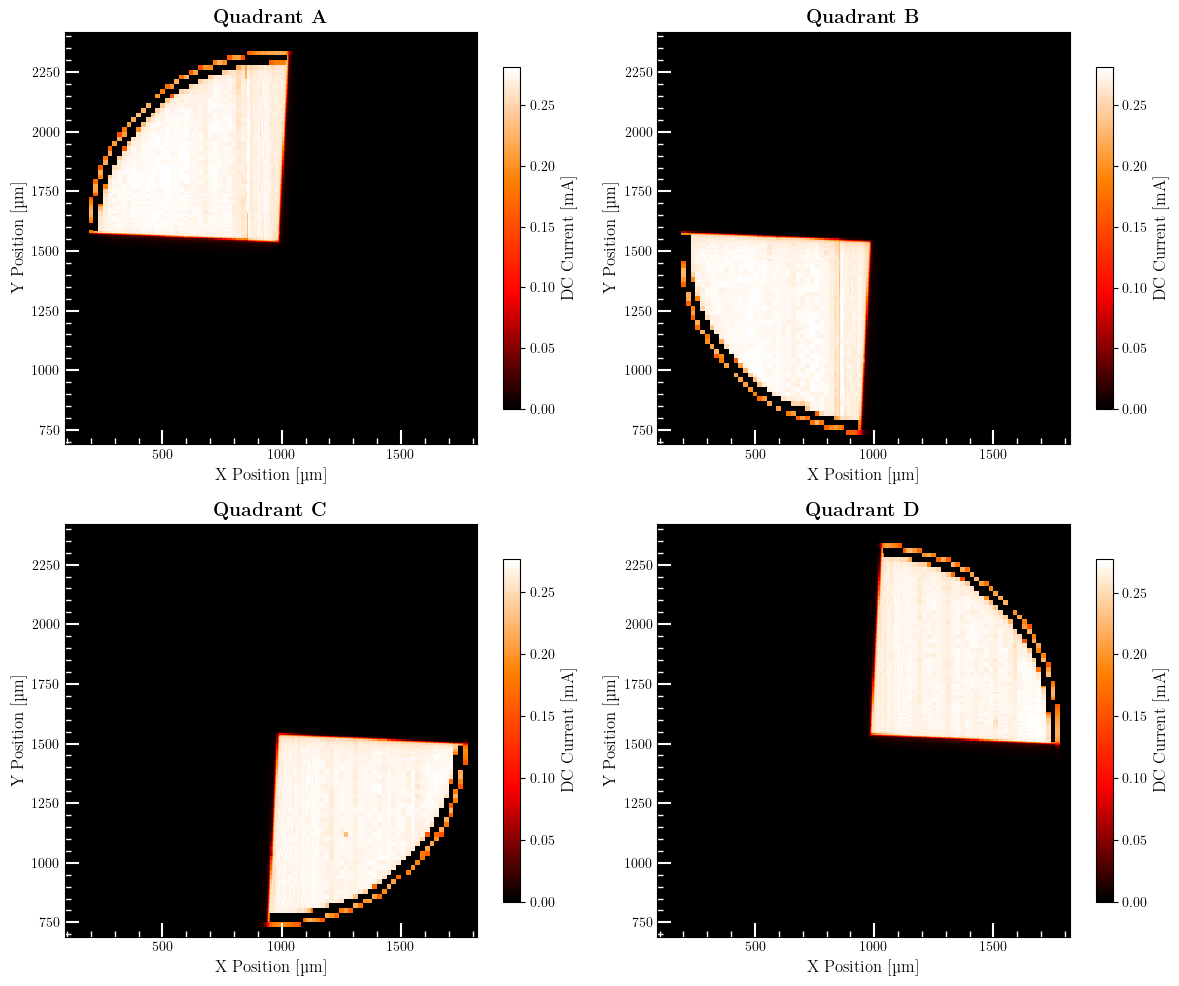

All plots generated and saved successfully.


In [39]:
import pickle
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors

font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"  
cmu_serif = fm.FontProperties(fname=font_path)
# Ensure LaTeX is in the PATH (done also in shell config) and enable rendering
os.environ['PATH'] += ':/usr/local/texlive/2024/bin/universal-darwin'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']  

# Data and figure directories
data_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
fig_dir = os.path.join(data_dir, "fig")

# Load .pkl files
file_list = sorted(glob.glob(os.path.join(data_dir, "*.pkl")))

def load_data(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)
    return data.get('rawdata', None)

# Custom colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 1)]  # Black -> Red -> Orange -> White
cm = mcolors.LinearSegmentedColormap.from_list("black_red_white", colors, N=100)

def plot_quadrant(ax, x, y, data, title, cm):
    c = ax.pcolormesh(x, y, data, shading='auto', cmap=cm, vmin=0, vmax=np.max(data))
    ax.set_title(rf"\textbf{{{title}}}", fontsize=14) 
    ax.set_xlabel(r"X Position [\textmu{}m]", fontsize=12)
    ax.set_ylabel(r"Y Position [\textmu{}m]", fontsize=12)  
    ax.set_aspect('equal')
    
    x_min, x_max = np.min(x), np.max(x)
    x_ticks = np.arange(max(500, x_min), x_max + 1, 500)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{int(tick)}" for tick in x_ticks])
    
    y_min, y_max = np.min(y), np.max(y)
    y_ticks = np.arange(max(750, y_min), y_max + 1, 250)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])
    
    ax.tick_params(which='major', direction='in', top=False, right=False, color='white', labelcolor='black', length=10, width=1.5) 
    ax.tick_params(which='minor', direction='in', top=False, right=False, color='white', labelcolor='black', length=4, width=1) 
    ax.minorticks_on()
    ax.grid(False)
    
    cbar = plt.colorbar(c, ax=ax, shrink=0.8)
    cbar.set_label(r"DC Current [mA]", fontsize=12)
    cbar.set_ticks(np.arange(0, 0.26, 0.05))

for file_path in file_list:
    rawdata = load_data(file_path)
    if rawdata is None:
        print(f"Skipping {file_path}, no 'rawdata' found.")
        continue
    
    x_positions = np.array(rawdata['stage_laser_xposition'])
    y_positions = np.array(rawdata['stage_laser_yposition'])
    grid_shape = (len(np.unique(x_positions)), len(np.unique(y_positions)))
    
    try:
        dccurr_A = np.array(rawdata['quadA']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_B = np.array(rawdata['quadB']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_C = np.array(rawdata['quadC']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_D = np.array(rawdata['quadD']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
    except ValueError:
        print(f"Skipping {file_path} due to unexpected data shape.")
        continue

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    plot_quadrant(axes[0, 0], x_positions, y_positions, dccurr_A, "Quadrant A", cm)
    plot_quadrant(axes[0, 1], x_positions, y_positions, dccurr_B, "Quadrant B", cm)
    plot_quadrant(axes[1, 0], x_positions, y_positions, dccurr_C, "Quadrant C", cm)
    plot_quadrant(axes[1, 1], x_positions, y_positions, dccurr_D, "Quadrant D", cm)
    
    filename = os.path.basename(file_path).replace(".pkl", ".png")
    save_path = os.path.join(fig_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white') 
    print(f"Saved: {save_path}")
    plt.tight_layout()
    plt.show()
    plt.close()

print("All plots generated and saved successfully.")

### HORIZONTAL SCANS

### Y = 1990um & 1790um (AD)

Found 2 slices to process.

====================== PROCESSING SLICE 1/2 ======================

=== GAP SENSITIVITY @ Y = 1990 µm ===
Mean plateau : 269.931 µA
Gap Extremum : 279.905 µA @ X = 1005.000 mm
→ Gap Sensitivity (GS) : +3.70 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_Y1990um_Quadrants_AD.png


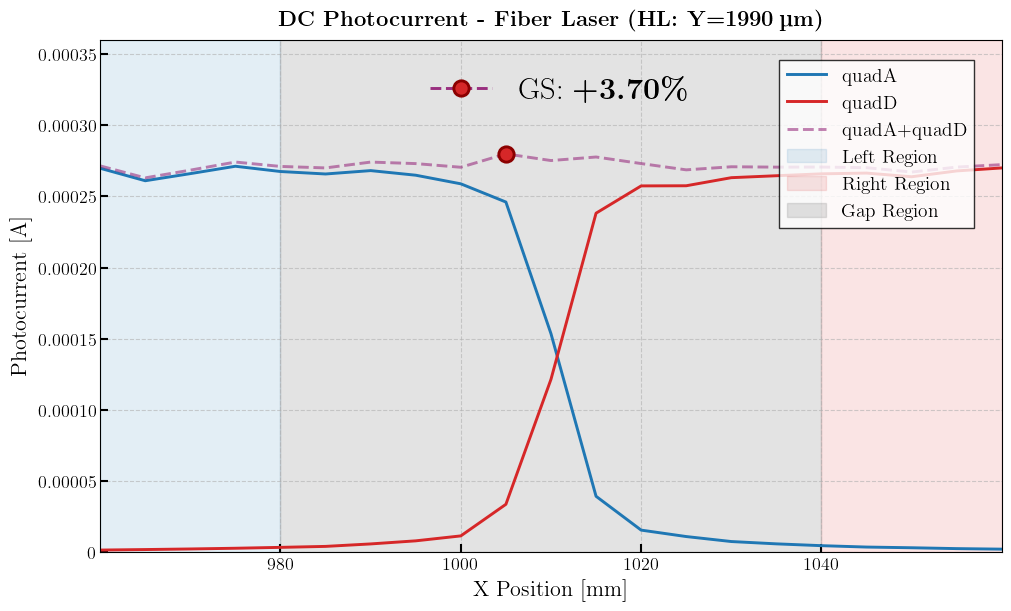

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results_AD.csv
 Y_position_um     X_scan_type     GS_%  Max_or_Min_in_gap_µA  Mean_plateau_µA
          1990 Horizontal (AD) 3.695142            279.904882       269.930564

====================== PROCESSING SLICE 2/2 ======================

=== GAP SENSITIVITY @ Y = 1790 µm ===
Mean plateau : 269.880 µA
Gap Extremum : 280.111 µA @ X = 1005.000 mm
→ Gap Sensitivity (GS) : +3.79 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_Y1790um_Quadrants_AD.png


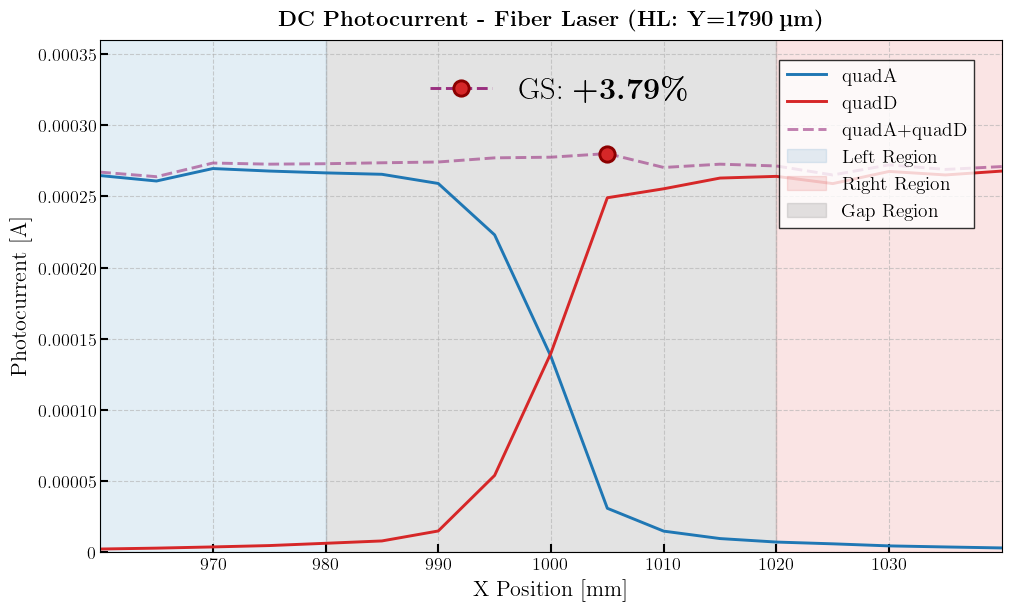

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results_AD.csv
 Y_position_um     X_scan_type     GS_%  Max_or_Min_in_gap_µA  Mean_plateau_µA
          1790 Horizontal (AD) 3.790951            280.111077       269.880057

====================== ALL SLICES PROCESSED ======================


In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle
import sys

# Package data into a dictionary for function access
GLOBAL_DATA = {
    'x_positions': x_positions,
    'y_positions': y_positions,
    'dccurr_A': dccurr_A,
    'dccurr_D': dccurr_D,
}

# ===================== USER CONFIGURATIONS =====================
# Define all parameters for all slices to be processed here.
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
BASE_SAVE_DIR = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
FINAL_FIG_DIR = os.path.join(BASE_SAVE_DIR, "fig_AS_011_CC")

# Define all slices here
SLICE_CONFIGS = [
    {
        # Configuration for Y=2000 um 
        'y_target': 2000,
        'x_min_plot': 960,
        'x_max_plot': 1060,
        'gap_region': (980, 1040),
        'left_region': (960, 980),
        'right_region': (1040, 1060),
        'csv_filename': "HorizontalScan_GapSensitivity_Results_AD.csv"
    },
    {
        # Configuration for Y=1800 um 
        'y_target': 1800,
        'x_min_plot': 960,
        'x_max_plot': 1040,
        'gap_region': (980, 1020),
        'left_region': (960, 980),
        'right_region': (1020, 1040),
        'csv_filename': "HorizontalScan_GapSensitivity_Results_AD.csv"
    }
]

# Ensure the output directory exists
os.makedirs(STAT_DIR, exist_ok=True)
os.makedirs(FINAL_FIG_DIR, exist_ok=True)


# ===================== FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"

for p in [cm_regular_path, cm_bold_path]:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
Y_FMT = FuncFormatter(y_formatter)

# ===================== PLOTTING FUNCTION  =====================

def process_and_plot_slice(config, data):
    """
    Processes a single slice of QPD data, calculates Gap Sensitivity (GS),
    and generates the plot and CSV entry based on the configuration.
    
    This function incorporates the increased font sizes and linewidths 
    from the reference script as requested.
    """
    # --- Load Config ---
    y_target = config['y_target']
    x_min_plot = config['x_min_plot']
    x_max_plot = config['x_max_plot']
    gap_region = config['gap_region']
    left_region = config['left_region']
    right_region = config['right_region']
    csv_filename = config['csv_filename']

    # --- Data Slicing & Processing ---
    x_positions, y_positions = data['x_positions'], data['y_positions']
    dccurr_A, dccurr_D = data['dccurr_A'], data['dccurr_D']

    unique_y = np.unique(y_positions)
    tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
    y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

    x_1D, y_1D = x_positions.flatten(), y_positions.flatten()
    idx = np.abs(y_1D - y_closest) < tolerance

    # Apply scaling (mA → A)
    x_slice = x_1D[idx]
    A_slice = dccurr_A.flatten()[idx] * 1e-3
    D_slice = dccurr_D.flatten()[idx] * 1e-3

    sort_idx = np.argsort(x_slice)
    x_s = x_slice[sort_idx]
    A_s = A_slice[sort_idx]
    D_s = D_slice[sort_idx]
    sum_s = A_s + D_s

    # Apply X limits
    mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
    x_s, A_s, D_s, sum_s = x_s[mask], A_s[mask], D_s[mask], sum_s[mask]

    # --- Gap Sensitivity Calculation ---
    l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
    r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
    g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

    mean_left = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
    mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
    mean_plateaus = (mean_left + mean_right) / 2.0

    gs_val, val_ext, x_at_ext = 0.0, 0.0, np.mean(x_s)

    if np.any(g_mask) and mean_plateaus > 0:
        max_in_gap = np.max(sum_s[g_mask])
        min_in_gap = np.min(sum_s[g_mask])
        overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
        undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0

        if abs(overshoot_percent) >= abs(undershoot_percent):
            gs_val = overshoot_percent
            val_ext = max_in_gap
            x_at_ext = x_s[g_mask][np.argmax(sum_s[g_mask])]
        else:
            gs_val = undershoot_percent
            val_ext = min_in_gap
            x_at_ext = x_s[g_mask][np.argmin(sum_s[g_mask])]
    elif np.any(g_mask):
         print("Warning: Mean plateau is zero, GS calculation skipped.")

    print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm ===")
    print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
    print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ X = {x_at_ext:.3f} mm")
    print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")

    # ===================== PLOT GENERATION  =====================
    plt.close('all')
    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

    # --- Region Highlighting ---
    ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:blue',   label=r'Left Region')
    ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:red', label=r'Right Region')
    ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')

    # --- Main Traces (Linewidth 2.1 from reference) ---
    ax.plot(x_s, A_s, label='quadA', color='tab:blue', lw=2.1)
    ax.plot(x_s, D_s, label='quadD', color='tab:red', lw=2.1)
    line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.1, alpha=0.6, label='quadA+quadD')[0]

    # --- Extremum Marker ---
    marker_color = '#d62728' if gs_val >= 0 else '#1f77b4'
    mec_color = 'darkred' if gs_val >= 0 else 'darkblue'

    # Marker size ms=11, width mew=2.1 from reference
    ax.plot(x_at_ext, val_ext, 'o', color=marker_color,
            mec=mec_color, mew=2.1, ms=11, zorder=10)

    # --- Title and Labels (Fontsize 16 from reference) ---
    ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (HL: Y={int(y_closest)}\,\textmu{{m}})}}",
                 fontsize=16, fontweight='bold', pad=10, loc='center')
    ax.set_xlabel(r'X Position [mm]', fontsize=16)
    ax.set_ylabel(r'Photocurrent [A]', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.6)
    # Tick labelsize=13 from reference
    ax.tick_params(axis='both', which='major', labelsize=13, length=6, width=1.5, direction='in')
    ax.yaxis.set_major_formatter(Y_FMT)
    ax.set_ylim(bottom=0, top=0.00036)
    ax.set_xlim(x_min_plot + 0.015, x_max_plot - 0.015)

    # --- Result Box (Inset) ---
    inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
    inset.axis('off')

    # Marker style (lw=2.1, mew=2.1, ms=11 from reference)
    custom_handle = Line2D([0], [0],
                           color="#992f7f", lw=2.1, ls='--',
                           marker='o', markerfacecolor=marker_color,
                           markeredgecolor=mec_color, markeredgewidth=2.1,
                           markersize=11)

    # Inset fontsize=22 from reference
    inset.legend(handles=[custom_handle],
                 labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
                 loc='center', fontsize=22, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

    # --- Legend Ordering (Fontsize 14 from reference) ---
    lines1, labels1 = ax.get_legend_handles_labels()
    preferred_order = ['quadA', 'quadD', 'quadA+quadD', r'Left Region', r'Right Region', r'Gap Region']
    label_to_handle = {l: h for h, l in zip(lines1, labels1) if l in preferred_order}
    final_handles = [label_to_handle[label] for label in preferred_order if label in label_to_handle]
    final_labels = [label for label in preferred_order if label in label_to_handle]

    ax.legend(final_handles, final_labels,
              fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 0.98),
              frameon=True, fancybox=False, edgecolor='black', ncol=1)

    # ===================== [ 5 ] SAVE PLOT AND CSV =====================
    filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_AD.png"
    save_path = os.path.join(FINAL_FIG_DIR, filename)
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
    print(f"→ PLOT SAVED → {save_path}")
    plt.show() # Keep show() inside the loop

    csv_path = os.path.join(STAT_DIR, csv_filename)
    results = {
        'Y_position_um': [int(y_closest)],
        'X_scan_type': ['Horizontal (AD)'],
        'GS_%': [gs_val],
        'Max_or_Min_in_gap_µA': [val_ext * 1e6],
        'Mean_plateau_µA': [mean_plateaus * 1e6]
    }
    df_results = pd.DataFrame(results)

    if os.path.exists(csv_path):
        # Note: If running this multiple times, this will keep appending!
        df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
    else:
        df_results.to_csv(csv_path, index=False, float_format='%.3f')

    print(f"→ GS RESULTS APPENDED/SAVED TO → {csv_path}")
    print(df_results.to_string(index=False))


# ===================== [ 6 ] MAIN EXECUTION LOOP =====================
print(f"Found {len(SLICE_CONFIGS)} slices to process.")
for i, config in enumerate(SLICE_CONFIGS):
    print(f"\n====================== PROCESSING SLICE {i+1}/{len(SLICE_CONFIGS)} ======================")
    process_and_plot_slice(config, GLOBAL_DATA)

print("\n====================== ALL SLICES PROCESSED ======================")

### Y = 1200um & 1400um (BC)

Found 2 slices to process (B+C).

====================== PROCESSING SLICE 1/2 ======================

=== GAP SENSITIVITY @ Y = 1400 µm (Quadrants B+C) ===
Mean plateau : 271.701 µA
Gap Extremum : 278.876 µA @ X = 985.000 mm
→ Gap Overshoot (GS) : +2.64 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_Y1400um_Quadrants_BC.png


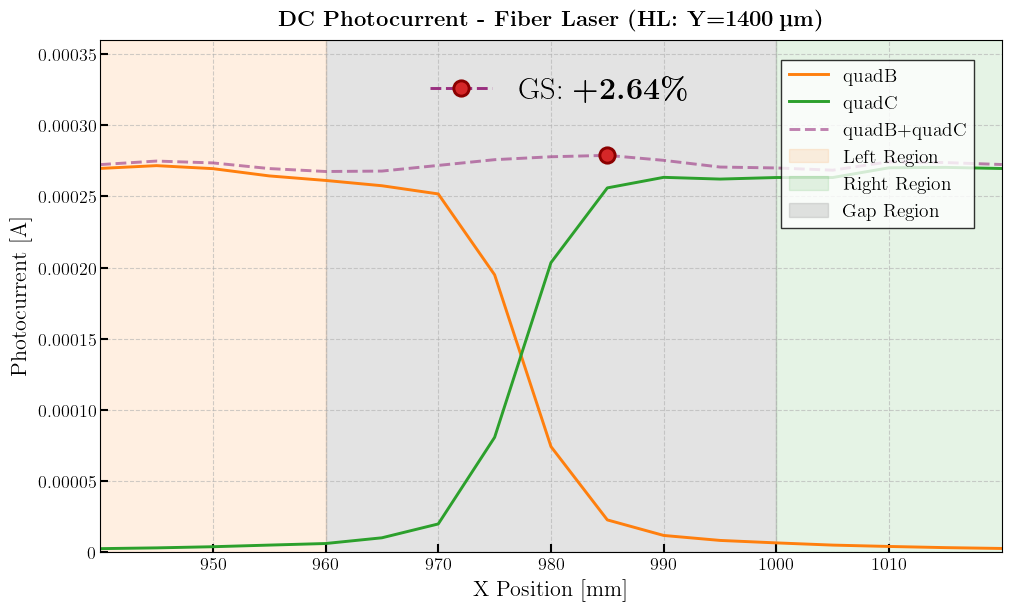

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results_BC.csv
 Y_position_um     X_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1400 Horizontal (BC) 2.640707     278.875763       271.700937

====================== PROCESSING SLICE 2/2 ======================

=== GAP SENSITIVITY @ Y = 1200 µm (Quadrants B+C) ===
Mean plateau : 273.123 µA
Gap Extremum : 279.124 µA @ X = 970.000 mm
→ Gap Overshoot (GS) : +2.20 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_Y1200um_Quadrants_BC.png


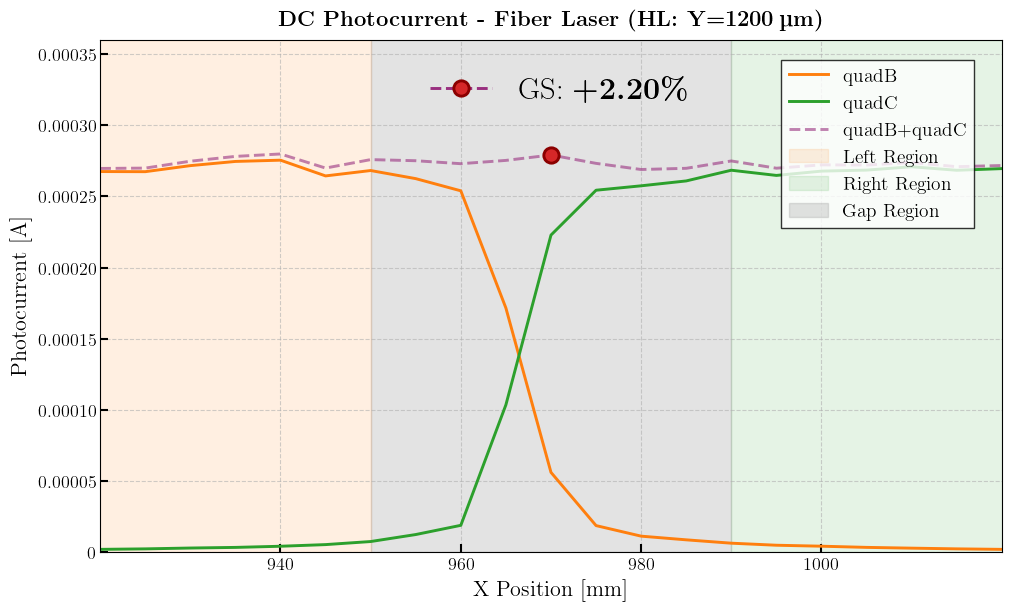

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/HorizontalScan_GapSensitivity_Results_BC.csv
 Y_position_um     X_scan_type    GS_%  Max_in_gap_µA  Mean_plateau_µA
          1200 Horizontal (BC) 2.19746     279.124496       273.122734

====================== ALL B+C SLICES PROCESSED ======================


In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle
import sys

# ===================== [ 0 ] ASSUMED DATA LOAD (REQUIRED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Ensure that dccurr_B and dccurr_C are also available.
GLOBAL_DATA = {
    'x_positions': x_positions,
    'y_positions': y_positions,
    # Quadrants A and D are not used in this script but are included for reference/completeness
    # 'dccurr_A': dccurr_A,
    # 'dccurr_D': dccurr_D,
    'dccurr_B': dccurr_B,  # Assuming these are available as per the old B&C script
    'dccurr_C': dccurr_C,  # Assuming these are available as per the old B&C script
}

# ===================== [ 1 ] USER CONFIGURATIONS (Internal List) =====================
# Define all parameters for all slices to be processed here.
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
BASE_SAVE_DIR = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
FINAL_FIG_DIR = os.path.join(BASE_SAVE_DIR, "fig_AS_011_CC")

# Define all slices for B/C analysis here
SLICE_CONFIGS_BC = [
    {
        # Configuration for Y=1400 um (based on old B&C script parameters)
        'y_target': 1400,
        'x_min_plot': 940,
        'x_max_plot': 1020,
        # IMPORTANT: These gap regions must be verified for B/C data!
        'gap_region': (960, 1000),
        'left_region': (850, 960),
        'right_region': (1000, 1100),
        'csv_filename': "HorizontalScan_GapSensitivity_Results_BC.csv" # New CSV for B/C
    },
    {
        # Configuration for Y=1600 um (new slice, using Y=1400 parameters as a template)
        'y_target': 1200,
        'x_min_plot': 920,
        'x_max_plot': 1020,
        # IMPORTANT: These gap regions must be verified for B/C data!
        'gap_region': (950, 990),
        'left_region': (850, 950),
        'right_region': (990, 1100),
        'csv_filename': "HorizontalScan_GapSensitivity_Results_BC.csv"
    }
]

# Ensure the output directory exists
os.makedirs(STAT_DIR, exist_ok=True)
os.makedirs(FINAL_FIG_DIR, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"

for p in [cm_regular_path, cm_bold_path]:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
Y_FMT = FuncFormatter(y_formatter)

# ===================== [ 3 ] CORE PLOTTING FUNCTION (Adapted for B&C) =====================

def process_and_plot_slice_BC(config, data):
    """
    Processes a single slice of QPD data for B&C quadrants, calculates 
    Gap Overshoot, and generates the plot and CSV entry based on the configuration.
    """
    # --- Load Config ---
    y_target = config['y_target']
    x_min_plot = config['x_min_plot']
    x_max_plot = config['x_max_plot']
    gap_region = config['gap_region']
    left_region = config['left_region']
    right_region = config['right_region']
    csv_filename = config['csv_filename']

    # --- Data Slicing & Processing ---
    x_positions, y_positions = data['x_positions'], data['y_positions']
    dccurr_B, dccurr_C = data['dccurr_B'], data['dccurr_C']

    unique_y = np.unique(y_positions)
    tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3
    y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]

    x_1D, y_1D = x_positions.flatten(), y_positions.flatten()
    idx = np.abs(y_1D - y_closest) < tolerance

    # Apply scaling (mA → A) for consistency with the A/D reference script
    x_slice = x_1D[idx]
    B_slice = dccurr_B.flatten()[idx] * 1e-3 
    C_slice = dccurr_C.flatten()[idx] * 1e-3

    sort_idx = np.argsort(x_slice)
    x_s = x_slice[sort_idx]
    B_s = B_slice[sort_idx]
    C_s = C_slice[sort_idx]
    sum_s = B_s + C_s

    # Apply X limits
    mask = (x_s >= x_min_plot) & (x_s <= x_max_plot)
    x_s, B_s, C_s, sum_s = x_s[mask], B_s[mask], C_s[mask], sum_s[mask]

    # --- Gap Overshoot Calculation ---
    l_mask = (x_s >= left_region[0]) & (x_s <= left_region[1])
    r_mask = (x_s >= right_region[0]) & (x_s <= right_region[1])
    g_mask = (x_s >= gap_region[0]) & (x_s <= gap_region[1])

    mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
    mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
    mean_plateaus = (mean_left + mean_right) / 2.0

    # B/C gap typically shows a peak (overshoot), calculate max only
    max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
    x_at_max = x_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(x_s)

    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0
    
    # Set the metrics to be saved/printed
    gs_val = overshoot_percent 
    val_ext = max_in_gap
    x_at_ext = x_at_max

    print(f"\n=== GAP SENSITIVITY @ Y = {int(y_closest)} µm (Quadrants B+C) ===")
    print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
    print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ X = {x_at_ext:.3f} mm")
    print(f"→ Gap Overshoot (GS) : {gs_val:+.2f} %\n")

    # ===================== [ 4 ] PLOT GENERATION (Applying Reference Styles) =====================
    plt.close('all')
    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

    # --- Region Highlighting ---
    # Using tab:orange and tab:green for region highlighting to match the B/C lines
    ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:orange',   label=r'Left Region')
    ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:green', label=r'Right Region')
    ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')

    # --- Main Traces (Linewidth 2.1 from reference) ---
    ax.plot(x_s, B_s, label='quadB', color='tab:orange', lw=2.1)
    ax.plot(x_s, C_s, label='quadC', color='tab:green', lw=2.1)
    line_sum = ax.plot(x_s, sum_s, '--', color="#992f7f", lw=2.1, alpha=0.6, label='quadB+quadC')[0]

    # --- Extremum Marker ---
    marker_color = '#d62728' # Always red for max/overshoot
    mec_color = 'darkred'    # Always darkred for max/overshoot

    # Marker size ms=11, width mew=2.1 from reference
    ax.plot(x_at_ext, val_ext, 'o', color=marker_color,
            mec=mec_color, mew=2.1, ms=11, zorder=10)

    # --- Title and Labels (Fontsize 16 from reference) ---
    ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (HL: Y={int(y_closest)}\,\textmu{{m}})}}",
                 fontsize=16, fontweight='bold', pad=10, loc='center')
    ax.set_xlabel(r'X Position [mm]', fontsize=16)
    # Using [A] unit for consistency with the A/D plot and the 1e-3 scaling applied
    ax.set_ylabel(r'Photocurrent [A]', fontsize=16) 
    ax.grid(True, linestyle='--', alpha=0.6)
    # Tick labelsize=13 from reference
    ax.tick_params(axis='both', which='major', labelsize=13, length=6, width=1.5, direction='in')
    ax.yaxis.set_major_formatter(Y_FMT)
    ax.set_ylim(bottom=0, top=0.00036) # Consistent with A/D plot limit
    ax.set_xlim(x_min_plot + 0.015, x_max_plot - 0.015)

    # --- Result Box (Inset) ---
    inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
    inset.axis('off')

    # Marker style (lw=2.1, mew=2.1, ms=11 from reference)
    custom_handle = Line2D([0], [0],
                           color="#992f7f", lw=2.1, ls='--',
                           marker='o', markerfacecolor=marker_color,
                           markeredgecolor=mec_color, markeredgewidth=2.1,
                           markersize=11)

    # Inset fontsize=22 from reference
    inset.legend(handles=[custom_handle],
                 labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
                 loc='center', fontsize=22, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

    # --- Legend Ordering (Fontsize 14 from reference) ---
    lines1, labels1 = ax.get_legend_handles_labels()
    preferred_order = ['quadB', 'quadC', 'quadB+quadC', r'Left Region', r'Right Region', r'Gap Region']
    label_to_handle = {l: h for h, l in zip(lines1, labels1) if l in preferred_order}
    final_handles = [label_to_handle[label] for label in preferred_order if label in label_to_handle]
    final_labels = [label for label in preferred_order if label in label_to_handle]

    ax.legend(final_handles, final_labels,
              fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 0.98),
              frameon=True, fancybox=False, edgecolor='black', ncol=1)

    # ===================== [ 5 ] SAVE PLOT AND CSV =====================
    filename = f"DC_Photocurrent_Y{int(y_closest):04d}um_Quadrants_BC.png"
    save_path = os.path.join(FINAL_FIG_DIR, filename)
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
    print(f"→ PLOT SAVED → {save_path}")
    plt.show() 

    csv_path = os.path.join(STAT_DIR, csv_filename)
    results = {
        'Y_position_um': [int(y_closest)],
        'X_scan_type': ['Horizontal (BC)'],
        'GS_%': [gs_val],
        'Max_in_gap_µA': [val_ext * 1e6], # Changed key name to reflect overshoot only
        'Mean_plateau_µA': [mean_plateaus * 1e6]
    }
    df_results = pd.DataFrame(results)

    if os.path.exists(csv_path):
        df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
    else:
        df_results.to_csv(csv_path, index=False, float_format='%.3f')

    print(f"→ GS RESULTS APPENDED/SAVED TO → {csv_path}")
    print(df_results.to_string(index=False))


# ===================== [ 6 ] MAIN EXECUTION LOOP =====================
print(f"Found {len(SLICE_CONFIGS_BC)} slices to process (B+C).")
for i, config in enumerate(SLICE_CONFIGS_BC):
    print(f"\n====================== PROCESSING SLICE {i+1}/{len(SLICE_CONFIGS_BC)} ======================")
    process_and_plot_slice_BC(config, GLOBAL_DATA)

print("\n====================== ALL B+C SLICES PROCESSED ======================")

### X = 1200um & 1400um (DC)

Found 2 slices to process (C+D Vertical).

====================== PROCESSING SLICE 1/2 ======================

=== GAP SENSITIVITY @ X = 1190 µm (Quadrants C+D) ===
Mean plateau : 267.186 µA
Gap Extremum : 273.778 µA @ Y = 1530.000 mm
→ Gap Overshoot (GS) : +2.47 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_X1190um_Quadrants_CD.png


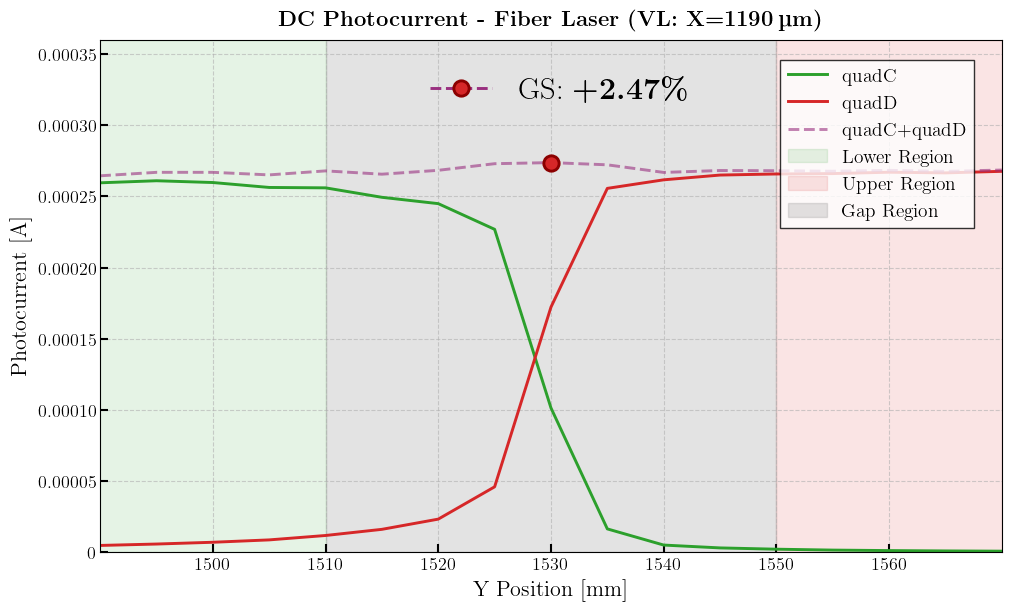

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results_CD.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1190 Vertical (CD) 2.467216     273.777898       267.185846

====================== PROCESSING SLICE 2/2 ======================

=== GAP SENSITIVITY @ X = 1490 µm (Quadrants C+D) ===
Mean plateau : 270.524 µA
Gap Extremum : 277.466 µA @ Y = 1510.000 mm
→ Gap Overshoot (GS) : +2.57 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_X1490um_Quadrants_CD.png


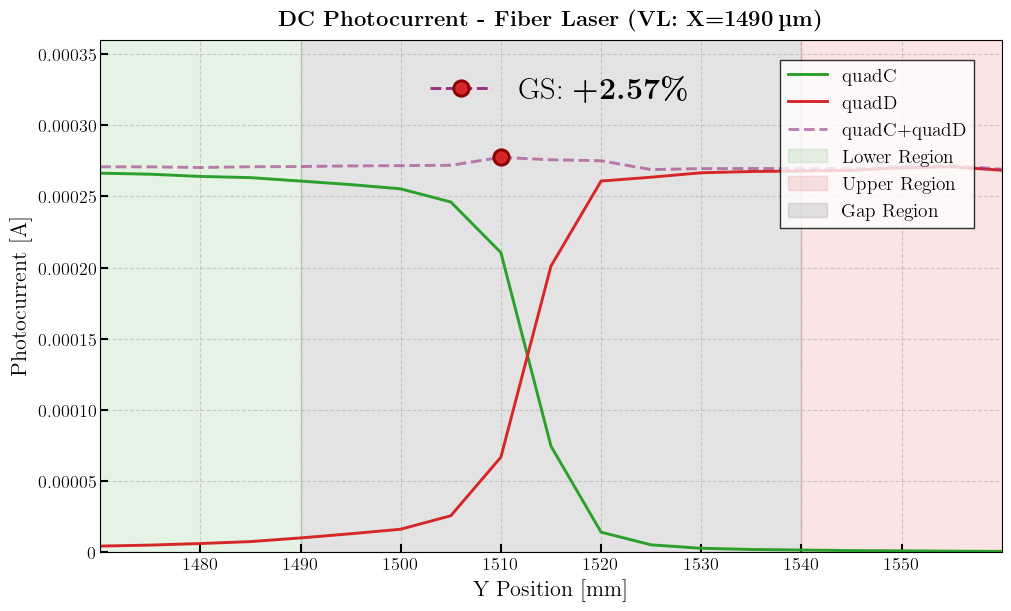

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results_CD.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
          1490 Vertical (CD) 2.565963     277.465888       270.524333

====================== ALL C+D VERTICAL SLICES PROCESSED ======================


In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle
import sys

# ===================== [ 0 ] ASSUMED DATA LOAD (REQUIRED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Ensure that dccurr_C and dccurr_D are available.
GLOBAL_DATA = {
    'x_positions': x_positions,
    'y_positions': y_positions,
    # Assuming these are available as per the old C&D script
    'dccurr_C': dccurr_C, 
    'dccurr_D': dccurr_D,
}

# ===================== [ 1 ] USER CONFIGURATIONS (Internal List) =====================
# Define all parameters for all vertical slices to be processed here.
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
BASE_SAVE_DIR = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
FINAL_FIG_DIR = os.path.join(BASE_SAVE_DIR, "fig_AS_011_CC")

# Define all slices for C/D vertical analysis here
SLICE_CONFIGS_CD = [
    {
        # Configuration for X=1390 um 
        'x_target': 1200,
        'y_min_plot': 1490,
        'y_max_plot': 1570,
        # IMPORTANT: These gap regions must be verified for C/D data!
        'gap_region': (1510, 1550),
        'left_region': (1470, 1510),  # Lower Y plateau region
        'right_region': (1550, 1570), # Higher Y plateau region
        'csv_filename': "VerticalScan_GapSensitivity_Results_CD.csv" # New CSV for C/D
    },
    {
        # Configuration for X=1490 um (new slice, using X=1390 parameters as a template)
        'x_target': 1490,
        'y_min_plot': 1470,
        'y_max_plot': 1560,
        'gap_region': (1490, 1540),
        'left_region': (1470, 1490),
        'right_region': (1540, 1570),
        'csv_filename': "VerticalScan_GapSensitivity_Results_CD.csv"
    }
]

# Ensure the output directory exists
os.makedirs(STAT_DIR, exist_ok=True)
os.makedirs(FINAL_FIG_DIR, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"

for p in [cm_regular_path, cm_bold_path]:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
Y_FMT = FuncFormatter(y_formatter)

# ===================== [ 3 ] CORE PLOTTING FUNCTION (Adapted for C&D Vertical) =====================

def process_and_plot_slice_CD(config, data):
    """
    Processes a single slice of QPD data for C&D quadrants, calculates 
    Gap Overshoot, and generates the plot and CSV entry based on the configuration.
    """
    # --- Load Config ---
    x_target = config['x_target']
    y_min_plot = config['y_min_plot']
    y_max_plot = config['y_max_plot']
    gap_region = config['gap_region']
    left_region = config['left_region']
    right_region = config['right_region']
    csv_filename = config['csv_filename']

    # --- Data Slicing & Processing (Targeting X-slice) ---
    x_positions, y_positions = data['x_positions'], data['y_positions']
    dccurr_C, dccurr_D = data['dccurr_C'], data['dccurr_D']

    unique_x = np.unique(x_positions)
    tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
    x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]

    x_1D, y_1D = x_positions.flatten(), y_positions.flatten()
    idx = np.abs(x_1D - x_closest) < tolerance

    # Apply scaling (mA → A) for consistency with the horizontal scripts
    y_slice = y_1D[idx]
    C_slice = dccurr_C.flatten()[idx] * 1e-3
    D_slice = dccurr_D.flatten()[idx] * 1e-3

    sort_idx = np.argsort(y_slice)
    y_s = y_slice[sort_idx]
    C_s = C_slice[sort_idx]
    D_s = D_slice[sort_idx]
    sum_s = C_s + D_s

    # Apply Y limits
    mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
    y_s, C_s, D_s, sum_s = y_s[mask], C_s[mask], D_s[mask], sum_s[mask]

    # --- Gap Overshoot Calculation ---
    l_mask = (y_s >= left_region[0]) & (y_s <= left_region[1])
    r_mask = (y_s >= right_region[0]) & (y_s <= right_region[1])
    g_mask = (y_s >= gap_region[0]) & (y_s <= gap_region[1])

    mean_left  = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
    mean_right = np.mean(sum_s[r_mask]) if np.any(r_mask) else 0
    mean_plateaus = (mean_left + mean_right) / 2.0

    # C/D gap typically shows a peak (overshoot)
    max_in_gap = np.max(sum_s[g_mask]) if np.any(g_mask) else 0
    y_at_max = y_s[g_mask][np.argmax(sum_s[g_mask])] if np.any(g_mask) else np.mean(y_s)

    overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0 if mean_plateaus > 0 else 0
    
    gs_val = overshoot_percent 
    val_ext = max_in_gap
    y_at_ext = y_at_max

    print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants C+D) ===")
    print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
    print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ Y = {y_at_ext:.3f} mm")
    print(f"→ Gap Overshoot (GS) : {gs_val:+.2f} %\n")

    # ===================== [ 4 ] PLOT GENERATION (Applying Reference Styles) =====================
    plt.close('all')
    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

    # --- Region Highlighting ---
    # Using tab:green and tab:red for region highlighting to match the C/D lines
    ax.axvspan(left_region[0], left_region[1], alpha=0.12, color='tab:green',   label=r'Lower Region')
    ax.axvspan(right_region[0], right_region[1], alpha=0.12, color='tab:red', label=r'Upper Region')
    ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray',       label=r'Gap Region')

    # --- Main Traces (Linewidth 2.1 from reference) ---
    # Note: X-axis is now Y-position (y_s)
    ax.plot(y_s, C_s, label='quadC', color='tab:green', lw=2.1)
    ax.plot(y_s, D_s, label='quadD', color='tab:red', lw=2.1)
    line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.1, alpha=0.6, label='quadC+quadD')[0]

    # --- Extremum Marker ---
    marker_color = '#d62728' # Always red for max/overshoot
    mec_color = 'darkred'    # Always darkred for max/overshoot

    # Marker size ms=11, width mew=2.1 from reference
    ax.plot(y_at_ext, val_ext, 'o', color=marker_color,
            mec=mec_color, mew=2.1, ms=11, zorder=10)

    # --- Title and Labels (Fontsize 16 from reference) ---
    # Note: Title now shows X position
    ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (VL: X={int(x_closest)}\,\textmu{{m}})}}",
                 fontsize=16, fontweight='bold', pad=10, loc='center')
    # Note: X-label is now Y Position
    ax.set_xlabel(r'Y Position [mm]', fontsize=16)
    # Using [A] unit for consistency
    ax.set_ylabel(r'Photocurrent [A]', fontsize=16) 
    ax.grid(True, linestyle='--', alpha=0.6)
    # Tick labelsize=13 from reference
    ax.tick_params(axis='both', which='major', labelsize=13, length=6, width=1.5, direction='in')
    ax.yaxis.set_major_formatter(Y_FMT)
    ax.set_ylim(bottom=0, top=0.00036) # Consistent with horizontal plot limit
    ax.set_xlim(y_min_plot + 0.015, y_max_plot - 0.015)

    # --- Result Box (Inset) ---
    inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
    inset.axis('off')

    # Marker style (lw=2.1, mew=2.1, ms=11 from reference)
    custom_handle = Line2D([0], [0],
                           color="#992f7f", lw=2.1, ls='--',
                           marker='o', markerfacecolor=marker_color,
                           markeredgecolor=mec_color, markeredgewidth=2.1,
                           markersize=11)

    # Inset fontsize=22 from reference
    inset.legend(handles=[custom_handle],
                 labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
                 loc='center', fontsize=22, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

    # --- Legend Ordering (Fontsize 14 from reference) ---
    lines1, labels1 = ax.get_legend_handles_labels()
    preferred_order = ['quadC', 'quadD', 'quadC+quadD', r'Lower Region', r'Upper Region', r'Gap Region']
    label_to_handle = {l: h for h, l in zip(lines1, labels1) if l in preferred_order}
    final_handles = [label_to_handle[label] for label in preferred_order if label in label_to_handle]
    final_labels = [label for label in preferred_order if label in label_to_handle]

    ax.legend(final_handles, final_labels,
              fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 0.98),
              frameon=True, fancybox=False, edgecolor='black', ncol=1)

    # ===================== [ 5 ] SAVE PLOT AND CSV =====================
    filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_CD.png"
    save_path = os.path.join(FINAL_FIG_DIR, filename)
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
    print(f"→ PLOT SAVED → {save_path}")
    plt.show() 

    csv_path = os.path.join(STAT_DIR, csv_filename)
    results = {
        'X_position_um': [int(x_closest)],
        'Y_scan_type': ['Vertical (CD)'],
        'GS_%': [gs_val],
        'Max_in_gap_µA': [val_ext * 1e6], 
        'Mean_plateau_µA': [mean_plateaus * 1e6]
    }
    df_results = pd.DataFrame(results)

    if os.path.exists(csv_path):
        df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
    else:
        df_results.to_csv(csv_path, index=False, float_format='%.3f')

    print(f"→ GS RESULTS APPENDED/SAVED TO → {csv_path}")
    print(df_results.to_string(index=False))


# ===================== [ 6 ] MAIN EXECUTION LOOP =====================
print(f"Found {len(SLICE_CONFIGS_CD)} slices to process (C+D Vertical).")
for i, config in enumerate(SLICE_CONFIGS_CD):
    print(f"\n====================== PROCESSING SLICE {i+1}/{len(SLICE_CONFIGS_CD)} ======================")
    process_and_plot_slice_CD(config, GLOBAL_DATA)

print("\n====================== ALL C+D VERTICAL SLICES PROCESSED ======================")

### X = 600um & 800m (AB)

Found 2 slices to process (A+B Vertical).

====================== PROCESSING SLICE 1/2 ======================

=== GAP SENSITIVITY @ X = 600 µm (Quadrants A+B) ===
Mean plateau : 276.096 µA
Gap Extremum : 283.593 µA @ Y = 1560.000 mm
→ Gap Sensitivity (GS) : +2.72 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_X0600um_Quadrants_AB.png


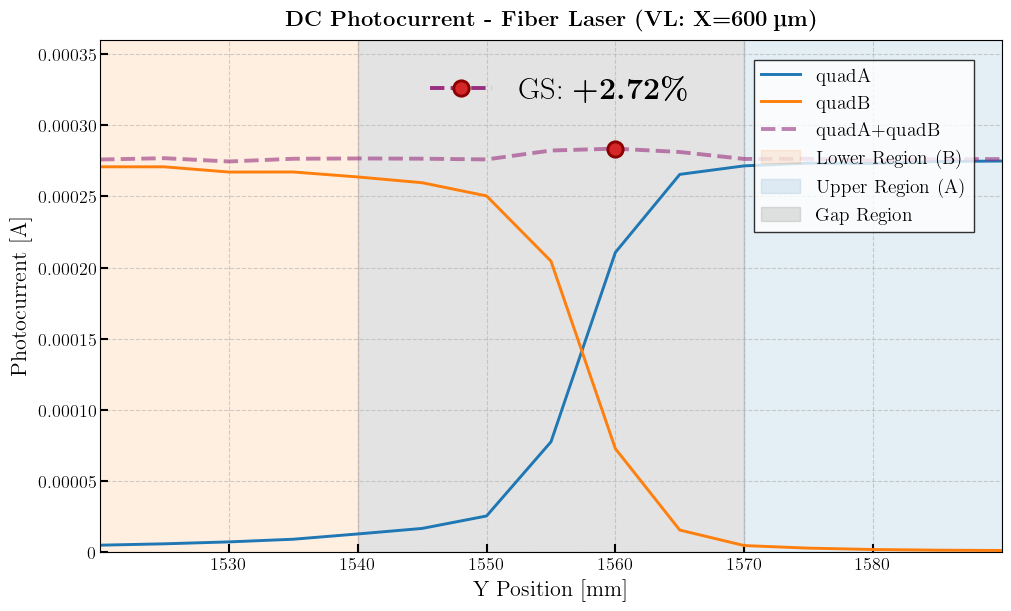

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results_AB.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
           600 Vertical (AB) 2.715496     283.592953       276.095589

====================== PROCESSING SLICE 2/2 ======================

=== GAP SENSITIVITY @ X = 800 µm (Quadrants A+B) ===
Mean plateau : 271.425 µA
Gap Extremum : 278.382 µA @ Y = 1550.000 mm
→ Gap Sensitivity (GS) : +2.56 %

→ PLOT SAVED → /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig_AS_011_CC/DC_Photocurrent_X0800um_Quadrants_AB.png


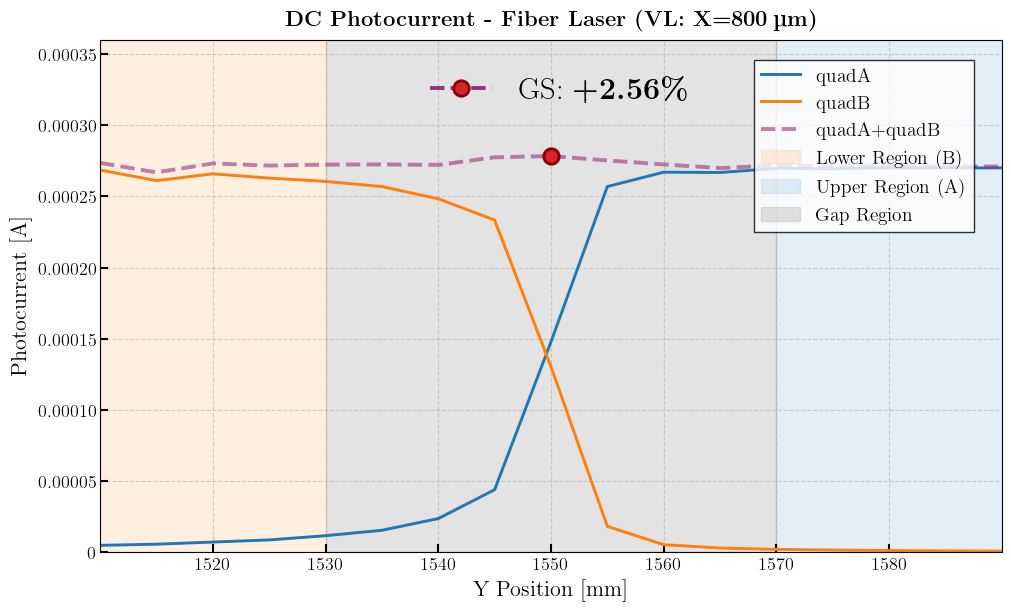

→ GS RESULTS APPENDED/SAVED TO → /Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study/VerticalScan_GapSensitivity_Results_AB.csv
 X_position_um   Y_scan_type     GS_%  Max_in_gap_µA  Mean_plateau_µA
           800 Vertical (AB) 2.563075     278.381517       271.424699

====================== ALL A+B VERTICAL SLICES PROCESSED ======================


In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.font_manager as fm
import pandas as pd
import pickle
import sys

# ===================== [ 0 ] ASSUMED DATA LOAD (REQUIRED) =====================
# This block assumes you have already loaded your data arrays into memory.
# Ensure that dccurr_A and dccurr_B are available.
GLOBAL_DATA = {
    'x_positions': x_positions,
    'y_positions': y_positions,
    'dccurr_A': dccurr_A, 
    'dccurr_B': dccurr_B,
}

# ===================== [ 1 ] USER CONFIGURATIONS (Internal List) =====================
# Define all parameters for all vertical A/B slices to be processed here.
STAT_DIR = "/Users/asca/Documents/University/Master Thesis/code/AS_011_CC/Fiber Laser/statistical study"
BASE_SAVE_DIR = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
FINAL_FIG_DIR = os.path.join(BASE_SAVE_DIR, "fig_AS_011_CC") # Using 'fig_AS_011_CC' for consistency

# Define all slices for A/B vertical analysis here
SLICE_CONFIGS_AB = [
    {
        # Configuration for X=600 um 
        'x_target': 600,
        'y_min_plot': 1520,
        'y_max_plot': 1590,
        # IMPORTANT: These gap regions must be verified for A/B data!
        'gap_region': (1540, 1570),
        'lower_region': (1510, 1540),  # Lower Y plateau (B side)
        'upper_region': (1570, 1590),  # Upper Y plateau (A side)
        'csv_filename': "VerticalScan_GapSensitivity_Results_AB.csv" 
    },
    {
        # Configuration for X=800 um (new slice, using X=600 parameters as a template)
        'x_target': 800,
        'y_min_plot': 1510,
        'y_max_plot': 1590,
        'gap_region': (1530, 1570),
        'lower_region': (1510, 1530),
        'upper_region': (1570, 1590),
        'csv_filename': "VerticalScan_GapSensitivity_Results_AB.csv"
    }
]

# Ensure the output directory exists
os.makedirs(STAT_DIR, exist_ok=True)
os.makedirs(FINAL_FIG_DIR, exist_ok=True)


# ===================== [ 2 ] FONT & PLOT SETUP =====================
cm_regular_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cm_bold_path    = "/Users/asca/Library/Fonts/cmunbx.ttf"

for p in [cm_regular_path, cm_bold_path]:
    if os.path.exists(p):
        fm.fontManager.addfont(p)

plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
})

def y_formatter(val, pos):
    """Formats y-axis to show up to 5 decimal places or '0'."""
    return '0' if abs(val) < 1e-12 else f'{val:.5f}'
Y_FMT = FuncFormatter(y_formatter)

# ===================== [ 3 ] CORE PLOTTING FUNCTION (Adapted for A&B Vertical) =====================

def process_and_plot_slice_AB(config, data):
    """
    Processes a single slice of QPD data for A&B quadrants, calculates 
    Gap Sensitivity (GS), and generates the plot and CSV entry based on the configuration.
    """
    # --- Load Config ---
    x_target = config['x_target']
    y_min_plot = config['y_min_plot']
    y_max_plot = config['y_max_plot']
    gap_region = config['gap_region']
    lower_region = config['lower_region']
    upper_region = config['upper_region']
    csv_filename = config['csv_filename']

    # --- Data Slicing & Processing (Targeting X-slice) ---
    x_positions, y_positions = data['x_positions'], data['y_positions']
    dccurr_A, dccurr_B = data['dccurr_A'], data['dccurr_B']

    unique_x = np.unique(x_positions)
    tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3
    x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]

    x_1D, y_1D = x_positions.flatten(), y_positions.flatten()
    idx = np.abs(x_1D - x_closest) < tolerance

    # Apply scaling (mA → A) for consistency
    y_slice = y_1D[idx]
    A_slice = dccurr_A.flatten()[idx] * 1e-3
    B_slice = dccurr_B.flatten()[idx] * 1e-3

    sort_idx = np.argsort(y_slice)
    y_s = y_slice[sort_idx]
    A_s = A_slice[sort_idx]
    B_s = B_slice[sort_idx]
    sum_s = A_s + B_s

    # Apply Y limits
    mask = (y_s >= y_min_plot) & (y_s <= y_max_plot)
    y_s, A_s, B_s, sum_s = y_s[mask], A_s[mask], B_s[mask], sum_s[mask]

    # --- Gap Sensitivity Calculation ---
    l_mask = (y_s >= lower_region[0]) & (y_s <= lower_region[1])
    u_mask = (y_s >= upper_region[0]) & (y_s <= upper_region[1])
    g_mask = (y_s >= gap_region[0]) & (y_s <= gap_region[1])

    mean_lower = np.mean(sum_s[l_mask]) if np.any(l_mask) else 0
    mean_upper = np.mean(sum_s[u_mask]) if np.any(u_mask) else 0
    mean_plateaus = (mean_lower + mean_upper) / 2.0

    gs_val, val_ext, y_at_ext = 0.0, 0.0, np.mean(y_s)

    if np.any(g_mask) and mean_plateaus > 0:
        max_in_gap = np.max(sum_s[g_mask])
        min_in_gap = np.min(sum_s[g_mask])
        
        overshoot_percent = (max_in_gap / mean_plateaus - 1.0) * 100.0
        undershoot_percent = (min_in_gap / mean_plateaus - 1.0) * 100.0
        
        # GS is the largest magnitude deviation (positive or negative)
        if abs(overshoot_percent) >= abs(undershoot_percent):
            gs_val = overshoot_percent
            val_ext = max_in_gap
            y_at_ext = y_s[g_mask][np.argmax(sum_s[g_mask])]
        else:
            gs_val = undershoot_percent
            val_ext = min_in_gap
            y_at_ext = y_s[g_mask][np.argmin(sum_s[g_mask])]
    elif np.any(g_mask):
         print("Warning: Mean plateau is zero, GS calculation skipped.")

    print(f"\n=== GAP SENSITIVITY @ X = {int(x_closest)} µm (Quadrants A+B) ===")
    print(f"Mean plateau : {mean_plateaus*1e6:.3f} µA")
    print(f"Gap Extremum : {val_ext*1e6:.3f} µA @ Y = {y_at_ext:.3f} mm")
    print(f"→ Gap Sensitivity (GS) : {gs_val:+.2f} %\n")

    # ===================== [ 4 ] PLOT GENERATION (Applying Reference Styles) =====================
    plt.close('all')
    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

    # --- Region Highlighting (Applying Linewidths/Fonts from Reference) ---
    ax.axvspan(lower_region[0], lower_region[1], alpha=0.12, color='tab:orange', label=r'Lower Region (B)') 
    ax.axvspan(upper_region[0], upper_region[1], alpha=0.12, color='tab:blue', label=r'Upper Region (A)') 
    ax.axvspan(gap_region[0], gap_region[1], alpha=0.22, color='gray', label=r'Gap Region')
    #ax.axhline(mean_plateaus, color='gray', ls=':', lw=2.1, label=r'Region Mean $I_{\rm{Plat}}$') # lw=2.1 from ref

    # --- Main Traces (Linewidth 2.1/2.8 from reference) ---
    ax.plot(y_s, A_s, label='quadA', color='tab:blue', lw=2.1) # lw=2.1 from ref
    ax.plot(y_s, B_s, label='quadB', color='tab:orange', lw=2.1) # lw=2.1 from ref
    line_sum = ax.plot(y_s, sum_s, '--', color="#992f7f", lw=2.8, alpha=0.6, label='quadA+quadB')[0] # lw=2.8 from ref

    # --- Extremum Marker ---
    marker_color = '#d62728' if gs_val >= 0 else '#1f77b4' 
    mec_color = 'darkred' if gs_val >= 0 else 'darkblue'
    
    # Marker size ms=11, width mew=2.1/2.0 from reference
    ax.plot(y_at_ext, val_ext, 'o', color=marker_color,
            mec=mec_color, mew=2.1, ms=11, zorder=10) 

    # --- Title and Labels (Fontsize 16/14 from reference) ---
    title_prop = fm.FontProperties(fname=cm_bold_path, weight='bold', size=16) # Title size 16 from ref
    ax.set_title(rf"\textbf{{DC Photocurrent - Fiber Laser (VL: X={int(x_closest)}\,\textmu{{m}})}}",
                 fontproperties=title_prop, pad=10, loc='center')
    ax.set_xlabel(r'Y Position [mm]', fontsize=16) # Size 16 from ref
    ax.set_ylabel(r'Photocurrent [A]', fontsize=16) # Size 16 from ref
    ax.grid(True, linestyle='--', alpha=0.6)
    # Tick labelsize=13 from reference
    ax.tick_params(axis='both', which='major', labelsize=13, length=6, width=1.5, direction='in')
    ax.yaxis.set_major_formatter(Y_FMT)
    ax.set_ylim(bottom=0, top=0.00036) # Consistent with horizontal plot limit
    ax.set_xlim(y_min_plot + 0.015, y_max_plot - 0.015) 

    # --- Result Box (Inset) ---
    inset = ax.inset_axes([0.32, 0.82, 0.38, 0.16], transform=ax.transAxes)
    inset.axis('off')

    # Marker style (lw=2.8, mew=2.1, ms=11 from reference)
    custom_handle = Line2D([0], [0],
                           color="#992f7f", lw=2.8, ls='--',
                           marker='o', markerfacecolor=marker_color,
                           markeredgecolor=mec_color, markeredgewidth=2.1,
                           markersize=11)

    # Inset fontsize=22 from reference
    inset.legend(handles=[custom_handle],
                 labels=[rf'GS: \textbf{{{gs_val:+.2f}\%}}'],
                 loc='center', fontsize=22, frameon=False,
                 handletextpad=0.9, handlelength=2.0)

    # --- Legend Ordering (Fontsize 14 from reference) ---
    lines1, labels1 = ax.get_legend_handles_labels()
    preferred_order = [
        'quadA', 'quadB', 'quadA+quadB',
        r'Lower Region (B)', r'Upper Region (A)', r'Gap Region', r'Region Mean $I_{\rm{Plat}}$',
    ]

    label_to_handle = {l: h for h, l in zip(lines1, labels1) if l in preferred_order}
    final_handles = [label_to_handle[label] for label in preferred_order if label in label_to_handle]
    final_labels = [label for label in preferred_order if label in label_to_handle]

    ax.legend(final_handles, final_labels,
              fontsize=14, loc='upper right', bbox_to_anchor=(0.98, 0.98), # Size 14 from ref
              frameon=True, fancybox=False, edgecolor='black', ncol=1)

    # ===================== [ 5 ] SAVE PLOT AND CSV =====================
    filename = f"DC_Photocurrent_X{int(x_closest):04d}um_Quadrants_AB.png"
    save_path = os.path.join(FINAL_FIG_DIR, filename)
    fig.savefig(save_path, dpi=400, bbox_inches='tight', facecolor='white')
    print(f"→ PLOT SAVED → {save_path}")
    plt.show() 

    csv_path = os.path.join(STAT_DIR, csv_filename)
    results = {
        'X_position_um': [int(x_closest)],
        'Y_scan_type': ['Vertical (AB)'],
        'GS_%': [gs_val],
        'Max_in_gap_µA': [val_ext * 1e6], 
        'Mean_plateau_µA': [mean_plateaus * 1e6]
    }
    df_results = pd.DataFrame(results)

    # Append to existing file or create new file
    if os.path.exists(csv_path):
        df_results.to_csv(csv_path, mode='a', header=False, index=False, float_format='%.3f')
    else:
        df_results.to_csv(csv_path, index=False, float_format='%.3f')

    print(f"→ GS RESULTS APPENDED/SAVED TO → {csv_path}")
    print(df_results.to_string(index=False))


# ===================== [ 6 ] MAIN EXECUTION LOOP =====================
print(f"Found {len(SLICE_CONFIGS_AB)} slices to process (A+B Vertical).")
for i, config in enumerate(SLICE_CONFIGS_AB):
    print(f"\n====================== PROCESSING SLICE {i+1}/{len(SLICE_CONFIGS_AB)} ======================")
    process_and_plot_slice_AB(config, GLOBAL_DATA)

print("\n====================== ALL A+B VERTICAL SLICES PROCESSED ======================")